In [3]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [4]:
data = pd.read_csv('CO2 Emissions_Canada.csv')

In [5]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Analysing the Dataset 

In [10]:
#data=data.drop('Model',axis=1,inplace=True)#drop is used for droping the column

In [6]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
data.columns=['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions']
data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             7385 non-null   object 
 1   Model                            7385 non-null   object 
 2   Vehicle_Class                    7385 non-null   object 
 3   Engine_Size                      7385 non-null   float64
 4   Cylinders                        7385 non-null   int64  
 5   Transmission                     7385 non-null   object 
 6   Fuel_Type                        7385 non-null   object 
 7   Fuel_Consumption_City            7385 non-null   float64
 8   Fuel_Consumption_Hwy             7385 non-null   float64
 9   Fuel_Consumption_Comb(L/100 km)  7385 non-null   float64
 10  Fuel_Consumption_Comb(mpg)       7385 non-null   int64  
 11  CO2_Emissions                    7385 non-null   int64  
dtypes: float64(4), int64

In [9]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [10]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

In [11]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [12]:
for i in cat:
    print("Column :",i)
    print('Count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)
    

Column : Make
Count of classes :  42
Counter({'FORD': 628, 'CHEVROLET': 588, 'BMW': 527, 'MERCEDES-BENZ': 419, 'PORSCHE': 376, 'TOYOTA': 330, 'GMC': 328, 'AUDI': 286, 'NISSAN': 259, 'JEEP': 251, 'DODGE': 246, 'KIA': 231, 'HONDA': 214, 'HYUNDAI': 210, 'MINI': 204, 'VOLKSWAGEN': 197, 'MAZDA': 180, 'LEXUS': 178, 'JAGUAR': 160, 'CADILLAC': 158, 'SUBARU': 140, 'VOLVO': 124, 'INFINITI': 108, 'BUICK': 103, 'RAM': 97, 'LINCOLN': 96, 'MITSUBISHI': 95, 'CHRYSLER': 88, 'LAND ROVER': 85, 'FIAT': 73, 'ACURA': 72, 'MASERATI': 61, 'ROLLS-ROYCE': 50, 'ASTON MARTIN': 47, 'BENTLEY': 46, 'LAMBORGHINI': 41, 'ALFA ROMEO': 30, 'GENESIS': 25, 'SCION': 22, 'SMART': 7, 'BUGATTI': 3, 'SRT': 2})
************************************************************************************************************************
Column : Model
Count of classes :  2053
Counter({'F-150 FFV': 32, 'F-150 FFV 4X4': 32, 'MUSTANG': 27, 'FOCUS FFV': 24, 'SONIC': 20, 'SONIC 5': 20, 'F-150': 20, 'F-150 4X4': 20, 'ATS': 19, 'ACCORD': 19,

In [13]:
# Putting different transmission sub-catagories into their respective catagories


data['Transmission'] = np.where(data['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['M5','M6','M7']),'Manual',data['Transmission'])

c(data['Transmission'].unique())

Counter({'Automatic of Selective type': 1,
         'Manual': 1,
         'CVT': 1,
         'Automated Manual': 1,
         'Automatic': 1})

In [14]:
# Renaming fuel types for better understanding

print(data['Fuel_Type'].value_counts())

data['Fuel_Type']= np.where(data['Fuel_Type']=='X','Regular gasoline',data['Fuel_Type'])
data['Fuel_Type']= np.where(data['Fuel_Type']=='Z','Premium gasoline',data['Fuel_Type'])
data['Fuel_Type']= np.where(data['Fuel_Type']=='E','Ethanol E85',data['Fuel_Type'])
data['Fuel_Type']= np.where(data['Fuel_Type']=='D','Diesel',data['Fuel_Type'])
data['Fuel_Type']= np.where(data['Fuel_Type']=='N','Natural gas',data['Fuel_Type'])

c(data['Fuel_Type'].unique())

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_Type, dtype: int64


Counter({'Premium gasoline': 1,
         'Diesel': 1,
         'Regular gasoline': 1,
         'Ethanol E85': 1,
         'Natural gas': 1})

In [15]:
data.dtypes[data.dtypes!='O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'], dtype=object)

# Handling Null Values

In [16]:
data.isnull().sum()

Make                               0
Model                              0
Vehicle_Class                      0
Engine_Size                        0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption_City              0
Fuel_Consumption_Hwy               0
Fuel_Consumption_Comb(L/100 km)    0
Fuel_Consumption_Comb(mpg)         0
CO2_Emissions                      0
dtype: int64

This dataset has no null values

# Handling Categorical Data

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
x='*'
for i in cat:#looping through all the categorical columns
    print("Label Encoding of: ",i)
    LE =LabelEncoder() #creating an object of LabelEncoding
    print(c(data[i]))#getting the class values before tranforming
    data[i] = LE.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

Label Encoding of:  Make
Counter({'FORD': 628, 'CHEVROLET': 588, 'BMW': 527, 'MERCEDES-BENZ': 419, 'PORSCHE': 376, 'TOYOTA': 330, 'GMC': 328, 'AUDI': 286, 'NISSAN': 259, 'JEEP': 251, 'DODGE': 246, 'KIA': 231, 'HONDA': 214, 'HYUNDAI': 210, 'MINI': 204, 'VOLKSWAGEN': 197, 'MAZDA': 180, 'LEXUS': 178, 'JAGUAR': 160, 'CADILLAC': 158, 'SUBARU': 140, 'VOLVO': 124, 'INFINITI': 108, 'BUICK': 103, 'RAM': 97, 'LINCOLN': 96, 'MITSUBISHI': 95, 'CHRYSLER': 88, 'LAND ROVER': 85, 'FIAT': 73, 'ACURA': 72, 'MASERATI': 61, 'ROLLS-ROYCE': 50, 'ASTON MARTIN': 47, 'BENTLEY': 46, 'LAMBORGHINI': 41, 'ALFA ROMEO': 30, 'GENESIS': 25, 'SCION': 22, 'SMART': 7, 'BUGATTI': 3, 'SRT': 2})
Counter({13: 628, 9: 588, 5: 527, 28: 419, 32: 376, 39: 330, 15: 328, 3: 286, 31: 259, 20: 251, 11: 246, 21: 231, 16: 214, 17: 210, 29: 204, 40: 197, 27: 180, 24: 178, 19: 160, 8: 158, 38: 140, 41: 124, 18: 108, 7: 103, 33: 97, 25: 96, 30: 95, 10: 88, 23: 85, 12: 73, 0: 72, 26: 61, 34: 50, 2: 47, 4: 46, 22: 41, 1: 30, 14: 25, 35: 22

# Visualization of Data

Make Vs CO2_Emissions

<AxesSubplot:xlabel='Make', ylabel='CO2_Emissions'>

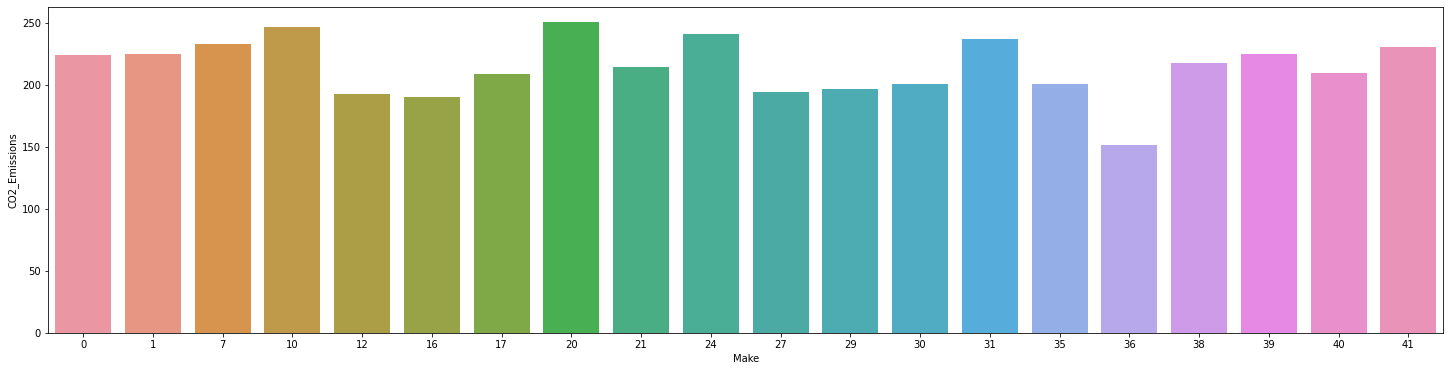

In [19]:
#grouping the Make and CO2_Emissions columns and storing top 20 classes
MCO2=data.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()

plt.figure(figsize=(25,6))

#plotting the barplot between Make and CO2_Emissions column

sns.barplot(x="Make",y="CO2_Emissions",data=MCO2)

Vehicle Vs CO2_Emissions

<AxesSubplot:xlabel='Vehicle_Class', ylabel='CO2_Emissions'>

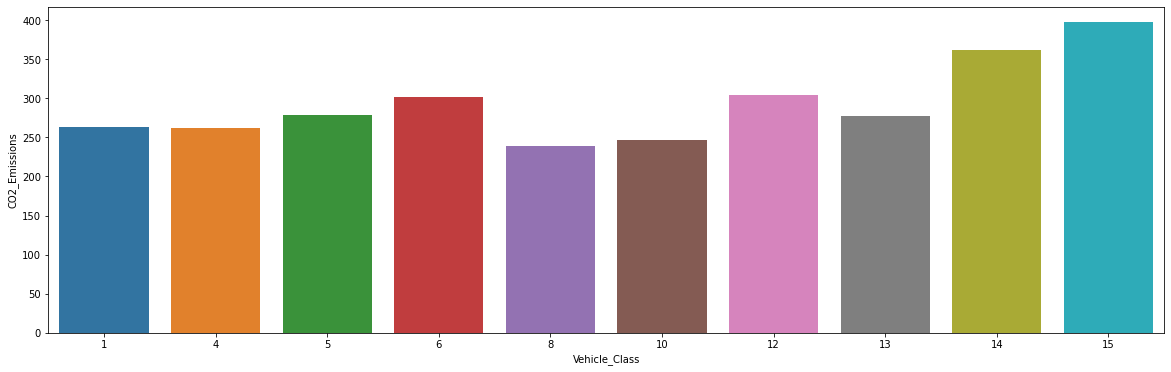

In [20]:
VC=data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Vehicle_Class',y='CO2_Emissions',data=VC)

Finding Correlation between the independent Columns

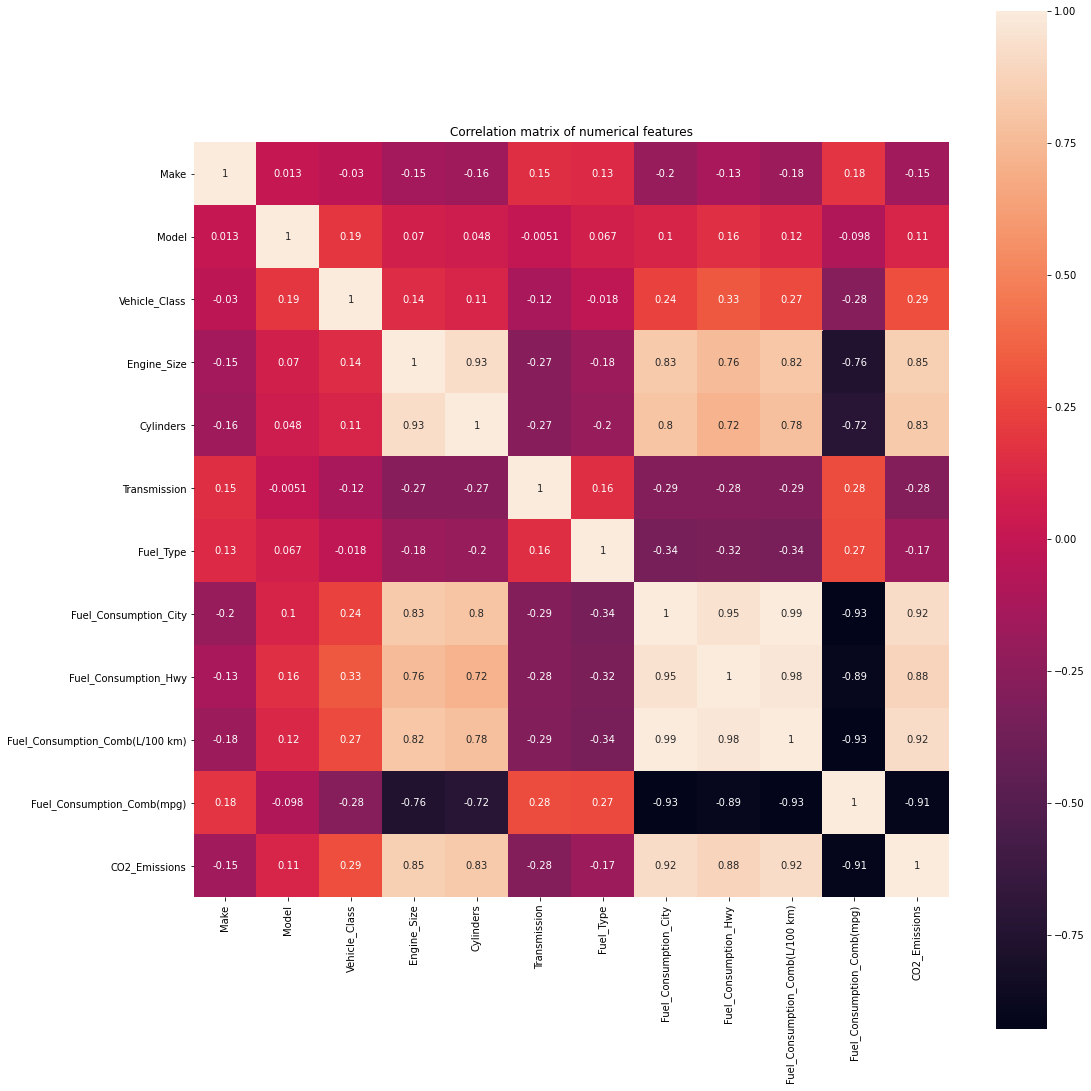

In [21]:
corr=data.corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr,annot=True, square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

Correlation with target column

<AxesSubplot:>

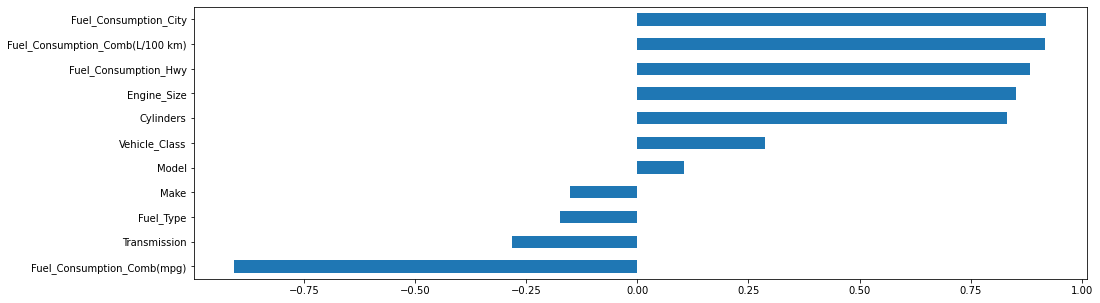

In [22]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

# Splitting the Data

Creating Dependent and Indepedent variable

In [23]:
x=data.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100 km)','Model'],axis=1)
x=pd.DataFrame(x)
y = data['CO2_Emissions']
y=pd.DataFrame(y)

Splitting dataset into train and test

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 9)
(1477, 9)
(5908, 1)
(1477, 1)


# Model Building

In [25]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [26]:
y_test.head()

,CO2_Emissions
3773,310
2805,214
194,340
7274,320
1660,308


In [27]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [28]:
scaler =StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train

array([[ 1.01312170e+00,  1.36543554e+00,  3.92196169e-01, ...,
        -1.00556112e-04,  1.02174698e-01, -3.32507490e-01],
       [ 1.63374147e+00, -1.11843581e+00, -4.90786987e-01, ...,
        -1.07511243e+00, -1.05423931e+00,  1.18989612e+00],
       [-5.82757698e-01,  1.36543554e+00,  2.45032309e-01, ...,
         2.20650277e+00,  1.79231825e+00, -1.43971011e+00],
       ...,
       [-1.29203743e+00,  1.15844626e+00,  9.07269676e-01, ...,
         8.20303245e-01,  1.03620140e+00, -8.86108802e-01],
       [-5.82757698e-01,  1.15844626e+00, -6.37950846e-01, ...,
        -1.00556112e-04, -2.53644998e-01, -1.94107163e-01],
       [ 1.72240143e+00,  1.36543554e+00, -1.22877339e-01, ...,
        -7.63924784e-01, -6.09464693e-01,  6.36294804e-01]])

In [30]:
lr.predict(x_test)  #predicted result

array([[203.12378311],
       [164.35128718],
       [200.36254735],
       ...,
       [147.17477867],
       [172.93382488],
       [152.681086  ]])

In [31]:
data['CO2_Emissions'].mean()

250.58469871360867

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:

y_pred = model.predict(x_test)
y_pred

array([[319.5346029 ],
       [218.83315202],
       [323.772647  ],
       ...,
       [131.31219185],
       [253.04329397],
       [193.92999601]])

In [34]:

np.sqrt(mean_squared_error(y_test, y_pred))

16.179154159103543

In [35]:
y_pred=lr.predict([[0,0,1.7,4,0,4,9.3,7.2,34]])
y_pred

array([[194.71813785]])

In [36]:
y_test.shape

(1477, 1)

In [37]:
y_pred.shape

(1, 1)

In [67]:
#from sklearn import metrics
#print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
#print("MSE:",metrics.mean_squared_error(y_test,y_pred))
#print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [38]:
pickle.dump(lr,open("CO2.pkl",'wb'))

In [39]:
pwd

'C:\\Users\\HP\\anaconda3'